In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing as pre


*** Question 1. (10 points) In the data folder, find and load the 2 files
stock_prediction_data.csv
stock_price.csv

This data predicts tomorrow’s stock price difference given the previous day’s data.
1) Use Preprocessing on the data
2) Perform regression on this dataset
(a) Solve it with Sklearn library for linear regression.
(b) Solve it by writing your own gradient descent algorithm in Python.
(c) Solve it by writing your own closed-form solution in Python.
(d) Print out the final total error for each method.
(e) No need to include this portion in the homework, but do it for your own sanity check.
• Print out the prediction of your function for every sample next to the true label
• Compare them against the true labels. How good is your prediction?

In [78]:
# importing
stock_price = np.genfromtxt('stock_price.csv', delimiter=',')
stock_prediction_data = np.genfromtxt('stock_prediction_data.csv', delimiter=',')

# preprocessing
scaler = pre.StandardScaler().fit(stock_prediction_data)
x = scaler.transform(stock_prediction_data)
y = stock_price
y = y.reshape(-1, 1)

print("X shape", x.shape)
print("Y shape", y.shape)

[[ 0.03891071 -1.21425547 -0.71462266 ...  0.95265681 -1.21992632
  -1.26277286]
 [ 0.28137056 -1.46950334  0.49864483 ... -0.34370698 -0.80916135
  -0.84126507]
 [ 1.34608558 -0.35193161  0.96796033 ...  0.61150844 -0.55927933
   0.45435316]
 ...
 [ 0.63276166  1.08297529  1.28431375 ...  0.09296293 -0.69962402
  -0.67542593]
 [ 0.22514799 -0.97970338 -0.13753841 ... -0.54157303 -0.82627656
  -1.63936589]
 [-0.1894935  -1.15561745  0.52645612 ...  0.61150844  1.37473907
  -1.43206698]]
X shape (300, 10)
Y shape (300, 1)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Fit model
model = LinearRegression()
model.fit(x, y)

# Get predictions
y_pred = model.predict(x)

# Find loss
loss = mean_squared_error(y, y_pred)
print("Loss: ", loss)
print("Weights: ", model.coef_.flatten())

Loss:  0.04357043923686068
Weights:  [[-0.00632907  4.0017033   0.00964999 -0.00765303  0.99228095  2.99424287
   3.99145859  2.98052853  0.98323214  1.0098116 ]]


In [41]:
# GD function
def gd(x, y, step_size, iterations):
    print("x", x.shape)
    print("y", y.shape)
    u = step_size
    
    # Generating feature map for linear regression
    ones = np.ones((x.shape[0], 1))
    fm = np.hstack((x,ones))
    print('fm', fm.shape)
    
    # Initializing weights (I chose these somewhat randomly)
    w = np.random.randn(fm.shape[1], 1)
    print('w', w.shape)
    
    # Gradient Descent
    for i in range(iterations):
    
        # Calculating loss
        tloss = 0
        for j in range(x.shape[0]):
            loss = (((w.T @ fm[j,:]) - y[j])**2)
            tloss += (1/x.shape[0]) * loss
    
        # Calculating gradient
        tdloss = np.zeros(w.shape)
        for j in range(x.shape[0]):
            dloss = (((w.T @ fm[j, :]) - y[j, :]) * fm[j, :])
            dloss = dloss.reshape(-1, 1)
            tdloss += (2/x.shape[0]) * dloss
    
        # Updating weights based on gradient
        w = w - u * (tdloss)
    
    # Printing Results
    print("\n\nLoss:\n ", tloss)
    print("\nGradient of Loss:\n ", tdloss)
    print("\nOptimal Weights:\n ", w)
    
    return w
w = gd(x, y, 0.01, 20000)

x (300, 10)
y (300, 1)
fm (300, 11)
w (11, 1)


Loss:
  [0.04357044]

Gradient of Loss:
  [[ 3.77979982e-17]
 [-4.27653247e-14]
 [-8.63295980e-17]
 [-3.58328818e-17]
 [-5.43011816e-15]
 [ 2.19056544e-14]
 [ 2.20913782e-14]
 [-2.21637216e-14]
 [-5.44020124e-15]
 [-1.07154953e-14]
 [ 5.13239624e-15]]

Optimal Weights:
  [[-0.00632907]
 [ 4.0017033 ]
 [ 0.00964999]
 [-0.00765303]
 [ 0.99228095]
 [ 2.99424287]
 [ 3.99145859]
 [ 2.98052853]
 [ 0.98323214]
 [ 1.0098116 ]
 [ 0.86593333]]


In [82]:
# Closed Form Solution
def cfs(x,y):
    # Append bias
    fm = np.hstack((x, np.ones((x.shape[0],1))))

    # Find closed-form solution
    weights = (np.linalg.inv((fm.T @ fm)) @ fm.T) @ y
    return weights
weights = cfs(x, y)
print(weights)

[[-0.00632907]
 [ 4.0017033 ]
 [ 0.00964999]
 [-0.00765303]
 [ 0.99228095]
 [ 2.99424287]
 [ 3.99145859]
 [ 2.98052853]
 [ 0.98323214]
 [ 1.0098116 ]
 [ 0.86593333]]


Question 2. (10 points) Repeat the previous question but this time use Polynomial regression (2nd order).

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Fit model
map = PolynomialFeatures(2)
feature_map = map.fit_transform(x, y)

# Get predictions
model = LinearRegression()
model.fit(feature_map, y)
y_pred = model.predict(feature_map)

# Find loss
loss = mean_squared_error(y, y_pred)
print("Loss: ", loss)
print("Weights: ", model.coef_.flatten())

Loss:  0.035501081015939386
Weights:  [-1.69147367e-17 -3.56450078e-03  3.99787135e+00  6.58679167e-03
 -9.72501931e-03  9.91626548e-01  2.99946522e+00  3.99574777e+00
  2.98618773e+00  9.84217991e-01  1.01729959e+00 -1.79242456e-02
  1.04764317e-02  1.86408777e-02  1.30226888e-02  1.09571145e-02
 -6.97951563e-03 -3.24639851e-04  2.13249229e-03  8.88376418e-03
 -1.01265135e-02  1.30415313e-02  2.13989537e-03  1.90056572e-02
  3.08312460e-03  6.34634242e-04 -1.15772811e-03  1.46451981e-02
  9.23384611e-03 -2.34482832e-02 -4.27911693e-05 -7.38294809e-03
 -1.19976290e-02 -8.97001508e-03  4.93166627e-03  2.31228484e-02
  6.01111666e-03 -1.98391508e-02  1.95344442e-02 -1.54094194e-02
  4.30293355e-03  5.30749842e-03 -1.56970428e-03  8.41643536e-03
 -1.57925001e-02 -1.02085505e-02  5.01169581e-02 -2.72193593e-02
 -7.22853665e-03 -1.39120096e-03 -1.19712209e-03  1.73444902e-02
 -1.69091402e-02 -4.09935055e-03  1.13227931e-02 -6.78221379e-03
 -6.68214430e-03 -8.09360777e-03  8.37197130e-03  9.

In [64]:
from sklearn.preprocessing import PolynomialFeatures

# We already defined the GD function,x and y are already defined so we really just have to make the feature map
# GD function
def poly_gd(x, y, step_size, iterations, degree):
    print("x", x.shape)
    print("y", y.shape)
    u = step_size
    
    poly = PolynomialFeatures(degree=degree, include_bias=True)
    fm = poly.fit_transform(x)
    x = fm
    
    # Initializing weights (I chose these somewhat randomly)
    w = np.random.randn(fm.shape[1], 1)
    print('w', w.shape)
    
    # Gradient Descent
    for i in range(iterations):
    
        # Calculating loss
        tloss = 0
        for j in range(x.shape[0]):
            loss = (((w.T @ fm[j,:]) - y[j])**2)
            tloss += (1/x.shape[0]) * loss
    
        # Calculating gradient
        tdloss = np.zeros(w.shape)
        for j in range(x.shape[0]):
            dloss = (((w.T @ fm[j, :]) - y[j, :]) * fm[j, :])
            dloss = dloss.reshape(-1, 1)
            tdloss += (2/x.shape[0]) * dloss
    
        # Updating weights based on gradient
        w = w - u * (tdloss)
    
    # Printing Results
    print("\n\nLoss:\n ", tloss)
    print("\nOptimal Weights:\n ", w)
    
    return w
w = poly_gd(x, y, 0.01, 20000, 2)

x (300, 10)
y (300, 1)
w (66, 1)


Loss:
  [0.03550108]

Optimal Weights:
  [[ 8.43017266e-01]
 [-3.56450077e-03]
 [ 3.99787135e+00]
 [ 6.58679166e-03]
 [-9.72501930e-03]
 [ 9.91626548e-01]
 [ 2.99946522e+00]
 [ 3.99574777e+00]
 [ 2.98618773e+00]
 [ 9.84217991e-01]
 [ 1.01729959e+00]
 [-1.79242455e-02]
 [ 1.04764317e-02]
 [ 1.86408777e-02]
 [ 1.30226888e-02]
 [ 1.09571144e-02]
 [-6.97951564e-03]
 [-3.24639845e-04]
 [ 2.13249230e-03]
 [ 8.88376418e-03]
 [-1.01265135e-02]
 [ 1.30415314e-02]
 [ 2.13989537e-03]
 [ 1.90056572e-02]
 [ 3.08312460e-03]
 [ 6.34634245e-04]
 [-1.15772809e-03]
 [ 1.46451981e-02]
 [ 9.23384612e-03]
 [-2.34482832e-02]
 [-4.27910806e-05]
 [-7.38294809e-03]
 [-1.19976290e-02]
 [-8.97001508e-03]
 [ 4.93166628e-03]
 [ 2.31228484e-02]
 [ 6.01111665e-03]
 [-1.98391508e-02]
 [ 1.95344442e-02]
 [-1.54094194e-02]
 [ 4.30293353e-03]
 [ 5.30749842e-03]
 [-1.56970428e-03]
 [ 8.41643537e-03]
 [-1.57925002e-02]
 [-1.02085504e-02]
 [ 5.01169581e-02]
 [-2.72193593e-02]
 [-7.2285366

In [70]:
# Closed Form Solution
def poly_cfs(x,y):
    # Append bias
    poly = PolynomialFeatures(degree=2, include_bias=True)
    fm = poly.fit_transform(x)

    # Find closed-form solution
    weights = (np.linalg.inv((fm.T @ fm)) @ fm.T) @ y
    return weights

weights = poly_cfs(x, y)
print(weights)

[[ 8.43017267e-01]
 [-3.56450078e-03]
 [ 3.99787135e+00]
 [ 6.58679167e-03]
 [-9.72501931e-03]
 [ 9.91626548e-01]
 [ 2.99946522e+00]
 [ 3.99574777e+00]
 [ 2.98618773e+00]
 [ 9.84217991e-01]
 [ 1.01729959e+00]
 [-1.79242456e-02]
 [ 1.04764317e-02]
 [ 1.86408777e-02]
 [ 1.30226888e-02]
 [ 1.09571145e-02]
 [-6.97951563e-03]
 [-3.24639851e-04]
 [ 2.13249229e-03]
 [ 8.88376418e-03]
 [-1.01265135e-02]
 [ 1.30415313e-02]
 [ 2.13989537e-03]
 [ 1.90056572e-02]
 [ 3.08312460e-03]
 [ 6.34634242e-04]
 [-1.15772811e-03]
 [ 1.46451981e-02]
 [ 9.23384611e-03]
 [-2.34482832e-02]
 [-4.27911693e-05]
 [-7.38294809e-03]
 [-1.19976290e-02]
 [-8.97001508e-03]
 [ 4.93166627e-03]
 [ 2.31228484e-02]
 [ 6.01111666e-03]
 [-1.98391508e-02]
 [ 1.95344442e-02]
 [-1.54094194e-02]
 [ 4.30293355e-03]
 [ 5.30749842e-03]
 [-1.56970428e-03]
 [ 8.41643536e-03]
 [-1.57925001e-02]
 [-1.02085505e-02]
 [ 5.01169581e-02]
 [-2.72193593e-02]
 [-7.22853665e-03]
 [-1.39120096e-03]
 [-1.19712209e-03]
 [ 1.73444902e-02]
 [-1.6909140

Question 3. (10 points) I recorded this video to help you with this question.
https://youtu.be/7FSIMC2xP2E?si=vt2nX0lak8E97zFf
Given the data 
[[0, 1],
 [1,0],
 [2,2],
 [3.-2]]

If we assume that the function to predict y from x is a linear function then the function would like.
                                    f(x) = ax + b
The goal is to use the data to identify the best a and b using the Closed-Form solution. Solve the question by
hand as well as using Python.

In [87]:
# Closed Form Solution
x = np.array([[0],
 [1],
 [2],
 [3]])
y = np.array([[1],[0],[2],[-2]])
weights = cfs(x, y)
print(weights)

[[-0.7]
 [ 1.3]]


Question 6. (10 points) Go to the data folder under ”probability distributions” and find the 3 csv file
SAT.csv
Lunch_wait_time.csv
Student_age.csv
For each file
1) Generate the histogram
2) Calculate the average value
3) Calculate the probability that someone scored higher than 1200 on SAT
4) Calculate the probability you have to wait more than 5 min.
5) Calculate the probability that someone is younger than 19

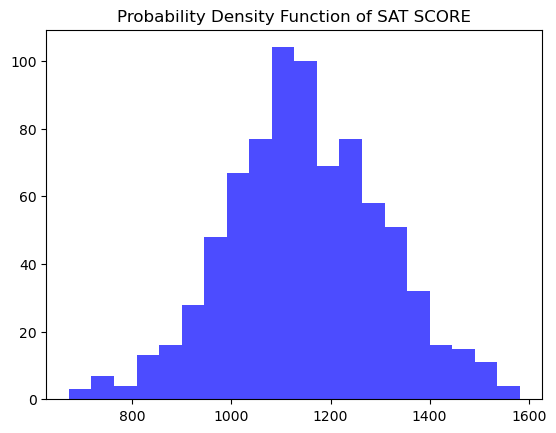

SAT Avg 1147.82875
SAT std 157.41561842281564


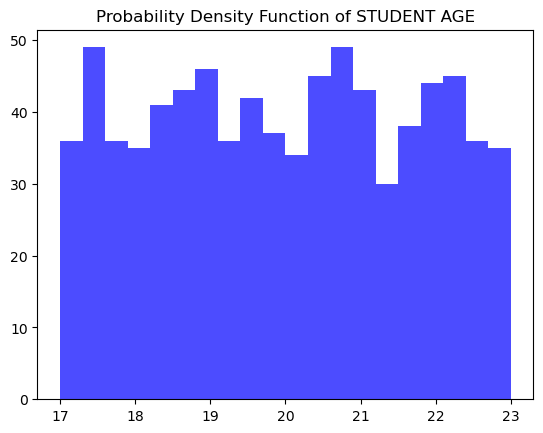

AGE Avg 19.931625
AGE std 1.7154262908603797


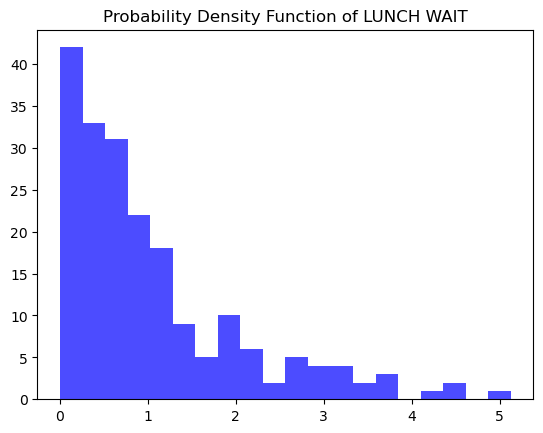

WAIT Avg 1.0405
WAIT std 1.0140659495318833
Probability of above 1200: 1-0.6298377271989073 
Probability of more than 5 minute wait:  4.719489547322375e-05
This amount of women are shorter than 5'7:  0.2935350955411665


In [92]:
from scipy.stats import norm

x = np.genfromtxt('SAT.csv', delimiter=',')
n, bins, patches = plt.hist(x, 20, facecolor = 'blue', alpha=0.7)
plt.title("Probability Density Function of SAT SCORE")
plt.show()
print("SAT Avg", np.mean(x))
print("SAT std", np.std(x))

y = np.genfromtxt('student_age.csv', delimiter=',')
n, bins, patches = plt.hist(y, 20, facecolor = 'blue', alpha=0.7)
plt.title("Probability Density Function of STUDENT AGE")
plt.show()
print("AGE Avg", np.mean(y))
print("AGE std", np.std(y))

z = np.genfromtxt('lunch_wait_time.csv', delimiter=',')
n, bins, patches = plt.hist(z, 20, facecolor = 'blue', alpha=0.7)
plt.title("Probability Density Function of LUNCH WAIT")
plt.show()
print("WAIT Avg", np.mean(z))
print("WAIT std", np.std(z))


print(f"Probability of above 1200: 1-{norm.cdf(1200, 1147.82875, 157.41561842281564)} ")


a = norm.cdf(5, 1.0405, 1.0140659495318833)
print("Probability of more than 5 minute wait: ", 1-a)


b = norm.cdf(19, 19.931625, 1.7154262908603797)
print("Probability that someone is less than 19yo: ", b)


Question 7. (20pts) Given the following distribution p(x)

Given that the total probability is always 1, it implies that the area between 0 and b must add up to 1, implying
that the integral between 0 and b must therefore also add up to 1 where

1) Use Numpy to find the value of b?
• Hints on how to solve this problem.
• If you don’t remember how to take integrals, make sure you watch my video on calculus refreshers.

https://youtu.be/N62Hdt5TV9g?si=Phynx6U_UeJRPEcS

• Note that if you have an expression x

2−x−2 = 0 (which we know the solution as (x+1)(x−2) = 0), we
can solve a more complex problem with with numpy.root. Try to understand the following command.

In [93]:
# Coefficient list
coefficients = [1, -1.5, 3, -3]
# Solve for b
roots = np.roots(coefficients)
print(roots)

[0.17317357+1.60326122j 0.17317357-1.60326122j 1.15365286+0.j        ]
